In [1]:
import os
import numpy as np
from tqdm import tqdm
from datasets import load_from_disk, load_dataset

/work/pi_mccallum_umass_edu/kchimmad_umass_edu/conda_envs/reason/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path='../outputs/exp-2.1.2/eval_1/logprobs1.json'
logprobs=load_dataset('json', data_files=data_path)['train']
logprobs

Dataset({
    features: ['prompt', 'gt_reasoning', 'gt_answer', 'student_token_ids', 'student_reasoning', 'student_answer', 'student_correctness', 'student_log_probs', 'teacher_log_probs', 'teacher_correctness'],
    num_rows: 1000
})

In [3]:
len(logprobs['student_log_probs'][0])

195

In [4]:
tr_stu_logprob_per_token=[]
tr_stu_logprob=[]
student_logprob=[]
teacher_logprob=[]

student_probs=[]
teacher_probs=[]

for i in tqdm(range(logprobs.num_rows)):
    per_token=[]
    stu_logprob_sum=0
    tr_logprob_sum=0
    student_log_probs=np.array(logprobs['student_log_probs'][i])
    teacher_log_probs=np.array(logprobs['teacher_log_probs'][i])
    
    student_probs.append(np.exp(student_log_probs).tolist())
    teacher_probs.append(np.exp(teacher_log_probs).tolist())
    
    tr_stu_logprob_per_token.append(
        np.subtract(teacher_log_probs,student_log_probs)
    )
    
    student_logprob.append(np.mean(student_log_probs))
    teacher_logprob.append(np.mean(teacher_log_probs))
    tr_stu_logprob.append(
        np.subtract(
            np.mean(teacher_log_probs),
            np.mean(student_log_probs)
        )
    )


100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]


In [5]:
logprobs=logprobs.add_column('teacher_student_logprob_per_token',tr_stu_logprob_per_token)
logprobs=logprobs.add_column('student_logprob',student_logprob)
logprobs=logprobs.add_column('teacher_logprob',teacher_logprob)
logprobs=logprobs.add_column('teacher_student_logprob',tr_stu_logprob)
logprobs=logprobs.add_column('student_prob',np.exp(student_logprob).tolist())
logprobs=logprobs.add_column('teacher_prob',np.exp(teacher_logprob).tolist())
logprobs=logprobs.add_column('student_probs',student_probs)
logprobs=logprobs.add_column('teacher_probs',teacher_probs)

                             

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df=logprobs.to_pandas()

In [21]:
df=df[df['teacher_correctness']==1]

In [22]:
df[df['student_correctness']==0].shape[0]/df[df['student_correctness']==1].shape[0]

0.06494960806270997

In [23]:
df1=df[df['student_correctness']==1].sample(frac=0.065, random_state=42)
df2=df[df['student_correctness']==0]

df=pd.concat([df1, df2])

In [24]:
df.head()

,prompt,gt_reasoning,gt_answer,student_token_ids,student_reasoning,student_answer,student_correctness,student_log_probs,teacher_log_probs,teacher_correctness,teacher_student_logprob_per_token,student_logprob,teacher_logprob,teacher_student_logprob,student_prob,teacher_prob,student_probs,teacher_probs
797,<|begin_of_text|><|start_header_id|>system<|en...,The meals cost 16+14=$<<16+14=30>>30\nSo each ...,21,"[1271, 1505, 704, 1268, 1790, 7957, 7318, 11, ...","To find out how much James paid, we need to ca...",2,1,"[-0.125, -0.234375, -0.1552734375, -0.00035476...","[-0.00023841857910100002, -0.24804687500000003...",1,"[0.124761581420899, -0.013671875000000028, 0.1...",-0.075934,-0.206435,-0.130501,0.926878,0.813479,"[0.8824969025845955, 0.791065110850296, 0.8561...","[0.9997616098403498, 0.7803233647630088, 0.962..."
495,<|begin_of_text|><|start_header_id|>system<|en...,Katherine's junior takes 1/4*20 = <<1/4*20=5>>...,750,"[1271, 1505, 279, 2860, 1396, 315, 4207, 62426...",To find the total number of hours Katherine's ...,7,1,"[-0.076171875, -0.5234375, -0.4746093750000000...","[-0.0791015625, -0.94140625, -0.97265625, -0.0...",1,"[-0.0029296875, -0.41796875, -0.49804687499999...",-0.159916,-0.419828,-0.259912,0.852215,0.657160,"[0.9266569237126416, 0.5924803921133679, 0.622...","[0.9239460814058078, 0.39007890102496307, 0.37..."
595,<|begin_of_text|><|start_header_id|>system<|en...,First add up the calories from all three meals...,600,"[1271, 1505, 704, 1268, 1690, 810, 25247, 2553...",To find out how many more calories Jacob ate t...,6,1,"[-0.03173828125, -0.1826171875, -0.1015625, -0...","[-3.0398368835449222e-05, -0.30078125, -0.0015...",1,"[0.03170788288116455, -0.1181640625, 0.1000595...",-0.091326,-0.274064,-0.182738,0.912720,0.760283,"[0.9687600915838744, 0.8330870108236715, 0.903...","[0.9999696020931903, 0.7402396824677261, 0.998..."
809,<|begin_of_text|><|start_header_id|>system<|en...,The medical cost comes out to 45*10+250=$<<45*...,1340,"[1271, 1505, 704, 1268, 1790, 8529, 690, 617, ...","To find out how much Tom will have to pay, we ...",1,1,"[-0.07568359375, -0.3359375, -0.2021484375, -0...","[-0.000280380249023, -0.73828125, -0.38671875,...",1,"[0.075403213500977, -0.40234375, -0.1845703125...",-0.100762,-0.381986,-0.281224,0.904148,0.682505,"[0.9271095033977684, 0.7146677711559482, 0.816...","[0.9997196590538456, 0.47793466018873804, 0.67..."
46,<|begin_of_text|><|start_header_id|>system<|en...,Since there were 300 fish-eater birds in the l...,1300,"[1271, 1505, 279, 2860, 1396, 315, 7795, 5773,...",To find the total number of fish-eater birds C...,1,1,"[-0.20703125, -0.2451171875, -0.048583984375, ...","[-2.264976501464843e-06, -0.08984375, -0.16015...",1,"[0.20702898502349854, 0.1552734375, -0.1115722...",-0.094795,-0.243688,-0.148893,0.909559,0.783732,"[0.812994243520487, 0.7826128204279885, 0.9525...","[0.9999977350260636, 0.9140739981758944, 0.852..."


In [25]:
df.shape

(116, 18)

In [26]:

# Define colors based on score
df['color'] = df['student_correctness'].map({1: 'green', 0: 'red'})


In [10]:
# df=df[df['teacher_correctness']==1]
# df.shape

(951, 19)

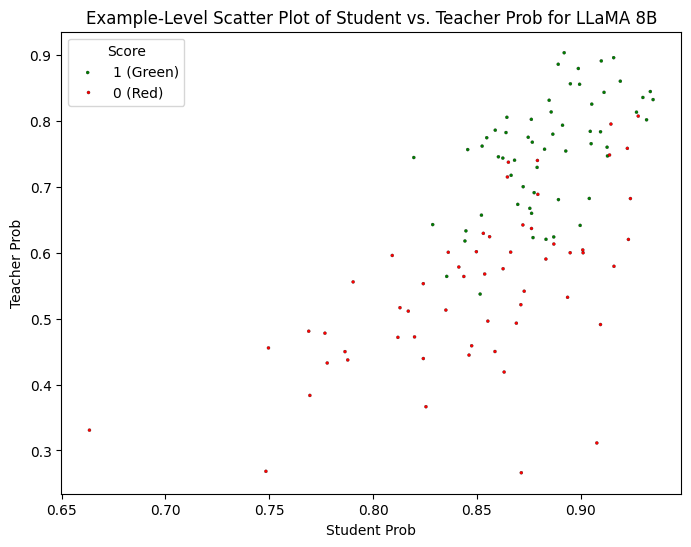

In [27]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['student_prob'], y=df['teacher_prob'], hue=df['student_correctness'], palette={1: 'green', 0: 'red'}, edgecolor='black', s=5)

# Labels and title
plt.xlabel("Student Prob")
plt.ylabel("Teacher Prob")
plt.title("Example-Level Scatter Plot of Student vs. Teacher Prob for LLaMA 8B")
plt.legend(title="Score", labels=[ "1 (Green)", "0 (Red)"])
plt.savefig('StuvsTrProbPerExample8B.png')
plt.show()


In [28]:
student_wrong=df[df['color']=='red']['student_probs'].explode().tolist()
teacher_wrong=df[df['color']=='red']['teacher_probs'].explode().tolist()


In [29]:
student_right=df[df['color']=='green']['student_probs'].explode().tolist()
teacher_right=df[df['color']=='green']['teacher_probs'].explode().tolist()


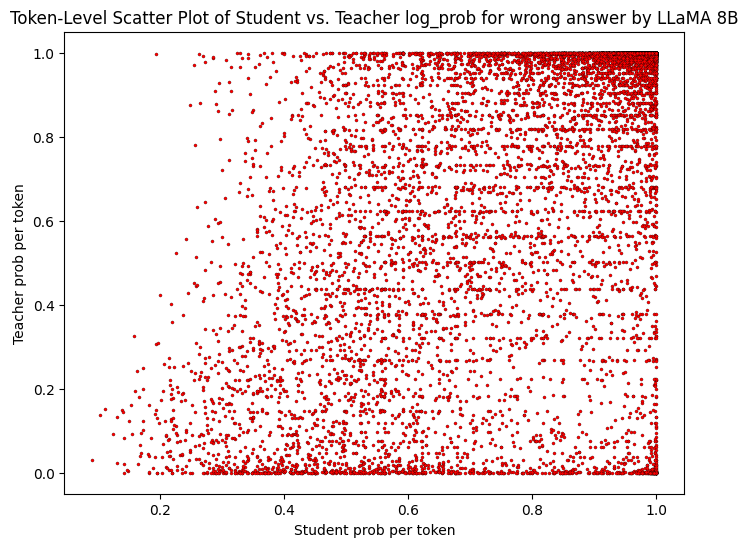

In [30]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=student_wrong, y=teacher_wrong, edgecolor='black', s=5, c='red')

# Labels and title
plt.xlabel("Student prob per token")
plt.ylabel("Teacher prob per token")
plt.title("Token-Level Scatter Plot of Student vs. Teacher log_prob for wrong answer by LLaMA 8B")
plt.savefig('StuvsTrProbPerTokenWrong8B.png')
plt.show()

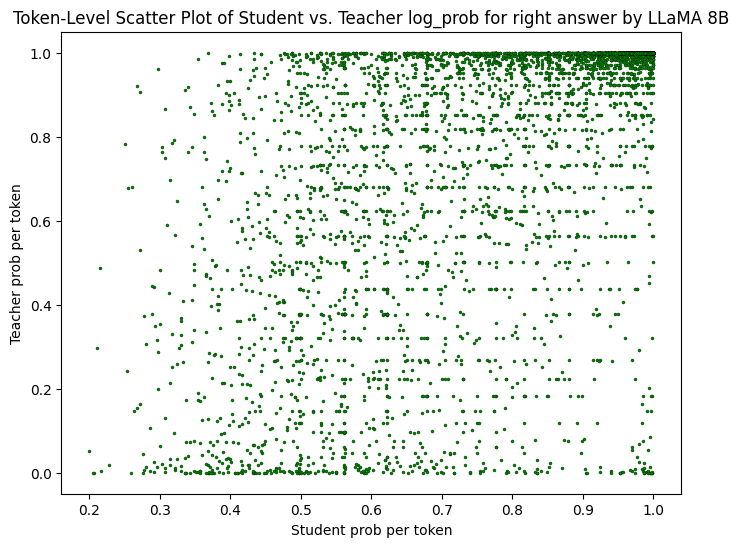

In [31]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=student_right, y=teacher_right, edgecolor='black', s=5, c='green')

# Labels and title
plt.xlabel("Student prob per token")
plt.ylabel("Teacher prob per token")
plt.title("Token-Level Scatter Plot of Student vs. Teacher log_prob for right answer by LLaMA 8B")
plt.savefig('StuvsTrProbPerTokenRight8B.png')
plt.show()

## logprob_ratio


In [1]:
import os
import numpy as np
from tqdm import tqdm
from datasets import load_from_disk, load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/work/pi_mccallum_umass_edu/kchimmad_umass_edu/conda_envs/reason/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path='../outputs/exp-2.1.1/eval_1/logprobs1.json'
logprobs=load_dataset('json', data_files=data_path)['train']
logprobs

Dataset({
    features: ['prompt', 'gt_reasoning', 'gt_answer', 'student_token_ids', 'student_reasoning', 'student_answer', 'student_correctness', 'student_log_probs', 'teacher_log_probs', 'teacher_correctness'],
    num_rows: 1000
})

In [ ]:
tr_stu_logprob_per_token=[]
tr_stu_logprob=[]
student_logprob=[]
teacher_logprob=[]
eps=1e-8
for i in tqdm(range(logprobs.num_rows)):
    per_token=[]
    stu_logprob_sum=0
    tr_logprob_sum=0
    student_log_probs=np.array(logprobs['student_log_probs'][i])
    teacher_log_probs=np.array(logprobs['teacher_log_probs'][i])
    tr_stu_logprob_per_token.append(
        np.divide(
            np.sum(teacher_log_probs,eps),
            np.sum(student_log_probs,eps)
        )
    )
    student_logprob.append(np.mean(student_log_probs))
    teacher_logprob.append(np.mean(teacher_log_probs))
    tr_stu_logprob.append(
        np.divide(
            np.mean(teacher_log_probs),
            np.mean(student_log_probs)
        )
    )


In [ ]:
logprobs=logprobs.add_column('teacher_student_logprob_per_token',tr_stu_logprob_per_token)
logprobs=logprobs.add_column('student_logprob',student_logprob)